C:\Users\Mclin\AppData\Local\Temp\ipykernel_18028\3783415490.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


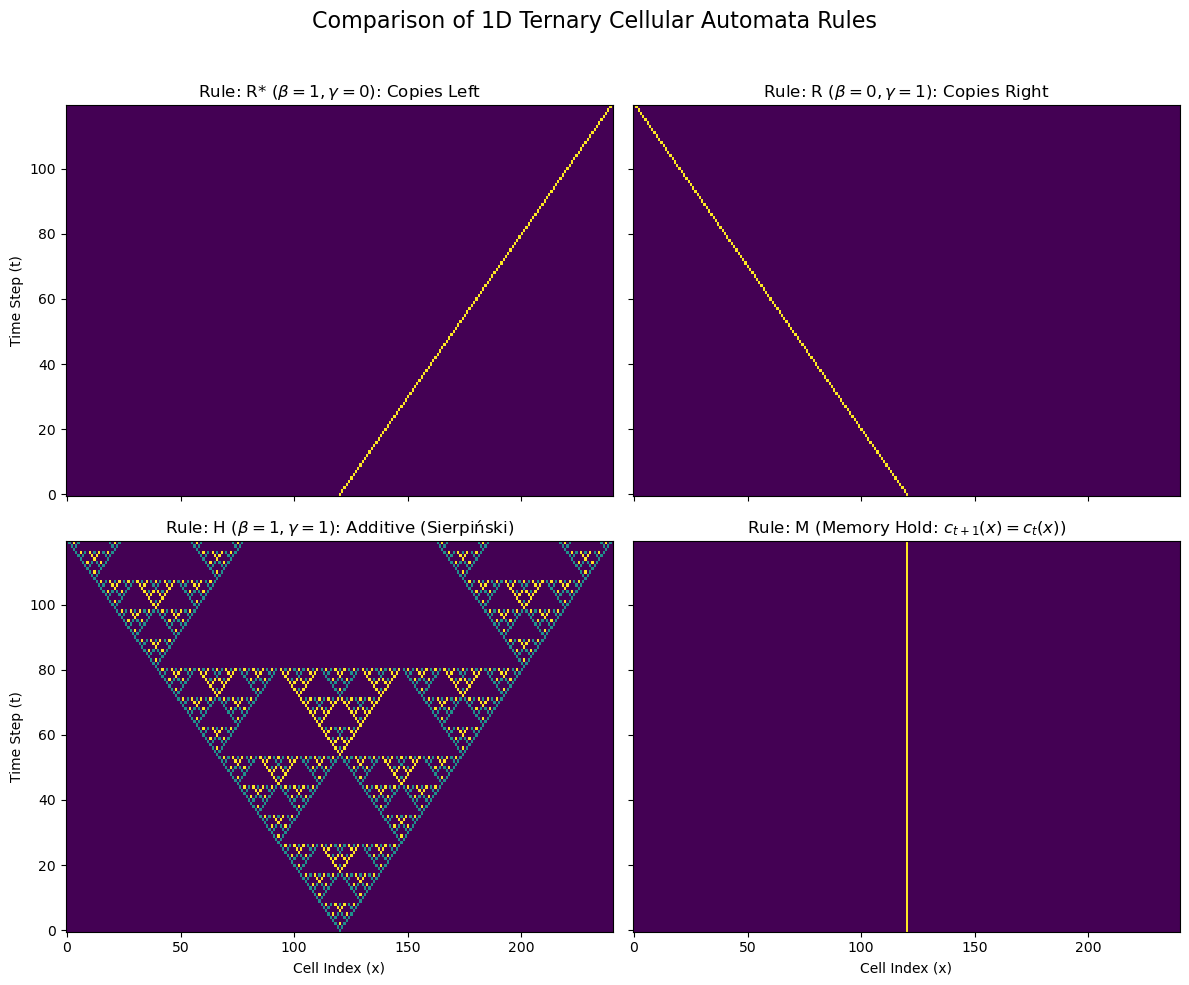


Note: The 'M' rule is implemented as c_t+1(x) = c_t(x) to reflect memory-hold.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ----------- Simulation parameters (can be tweaked) -----------------
width, steps = 241, 120   # Lattice size and time
seed_state = 1            # Initial trit placed at center: 0, 1, or 2
# --------------------------------------------------------------------

rule_definitions = {
    "Rstar": {"beta": 1, "gamma": 0, "label": r"R* ($\beta=1, \gamma=0$): Copies Left"},
    "R":     {"beta": 0, "gamma": 1, "label": r"R ($\beta=0, \gamma=1$): Copies Right"},
    "H":     {"beta": 1, "gamma": 1, "label": r"H ($\beta=1, \gamma=1$): Additive (Sierpiński)"},
    "M":     {"beta": None, "gamma": None, "label": r"M (Memory Hold: $c_{t+1}(x)=c_t(x)$)"} # Special handling
}

rule_names_to_plot = ["Rstar", "R", "H", "M"]

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axs = axs.flatten() # Flatten for easy iteration

# --- Colormap ---
try:
    cmap = plt.cm.get_cmap('viridis', 3)
except AttributeError: # For older matplotlib
    from matplotlib.colors import ListedColormap
    viridis_colors = plt.cm.viridis(np.linspace(0, 1, 3))
    cmap = ListedColormap(viridis_colors)

for i, rule_name in enumerate(rule_names_to_plot):
    ax = axs[i]
    definition = rule_definitions[rule_name]
    beta, gamma = definition["beta"], definition["gamma"]

    grid = np.zeros((steps, width), dtype=int)
    if width > 0 and steps > 0:
        grid[0, width // 2] = seed_state

    for t in range(steps - 1):
        if rule_name == "M":
            grid[t+1] = grid[t] # Memory-hold rule
        else:
            if beta is None or gamma is None: # Should not happen for R*, R, H
                raise ValueError(f"Beta and Gamma must be defined for rule {rule_name}")
            
            left_neighbor_values = np.roll(grid[t], 1)
            right_neighbor_values = np.roll(grid[t], -1)
            grid[t+1] = (beta * left_neighbor_values + gamma * right_neighbor_values) % 3
    
    ax.imshow(grid, aspect='auto', origin='lower', cmap=cmap, interpolation='nearest')
    ax.set_title(f"Rule: {definition['label']}")
    if i >= 2: # Add x-label to bottom row plots
        ax.set_xlabel("Cell Index (x)")
    if i % 2 == 0: # Add y-label to left column plots
        ax.set_ylabel("Time Step (t)")

fig.suptitle("Comparison of 1D Ternary Cellular Automata Rules", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout for suptitle
plt.show()

# --- Optional: Quick Diagnostics (can be run individually by setting rule_name) ---
# To run diagnostics for a specific rule, you would uncomment this section
# and set 'rule_name_diag' to one of "Rstar", "R", "H", "M".

# rule_name_diag = "H" # Example: Choose a rule to diagnose
# print(f"\n--- Diagnostics for rule: {rule_name_diag} (if re-run individually) ---")
# if rule_name_diag in rule_definitions:
#     definition_diag = rule_definitions[rule_name_diag]
#     beta_diag, gamma_diag = definition_diag["beta"], definition_diag["gamma"]
#
#     grid_diag = np.zeros((steps, width), dtype=int)
#     if width > 0 and steps > 0:
#         grid_diag[0, width // 2] = seed_state
#
#     for t in range(steps - 1):
#         if rule_name_diag == "M":
#             grid_diag[t+1] = grid_diag[t]
#         else:
#             left_diag = np.roll(grid_diag[t], 1)
#             right_diag = np.roll(grid_diag[t], -1)
#             grid_diag[t+1] = (beta_diag * left_diag + gamma_diag * right_diag) % 3
#
#     # 1. Rule application check
#     if steps > 1:
#         t_check = min(steps // 2, steps - 2) # Ensure t_check and t_check+1 are valid indices
#         if rule_name_diag == "M":
#             if np.array_equal(grid_diag[t_check+1], grid_diag[t_check]):
#                 print("1. Memory-hold check for M rule: Passed at test step.")
#             else:
#                 print("1. Memory-hold check for M rule: FAILED at test step.")
#         else:
#             left_check = np.roll(grid_diag[t_check], 1)
#             right_check = np.roll(grid_diag[t_check], -1)
#             expected_grid_t_check_plus_1 = (beta_diag * left_check + gamma_diag * right_check) % 3
#             if np.array_equal(grid_diag[t_check+1], expected_grid_t_check_plus_1):
#                 print(f"1. Rule application check for {rule_name_diag}: Passed at test step.")
#             else:
#                 print(f"1. Rule application check for {rule_name_diag}: FAILED at test step.")
#
#     # 2. State histogram
#     if grid_diag.size > 0:
#         counts_diag = np.bincount(grid_diag.flatten(), minlength=3)
#         print(f"2. State histogram for {rule_name_diag} (counts for 0, 1, 2): {counts_diag}")
#         counts_last_step_diag = np.bincount(grid_diag[-1], minlength=3)
#         print(f"   State histogram for last time step: {counts_last_step_diag}")
#
#     # 3. Additivity (H only)
#     if rule_name_diag == "H" and steps > 1:
#         # (Additivity check code from previous script can be inserted here if needed)
#         print("3. Additivity check for H rule (conceptual - not fully re-implemented in this loop structure).")
# else:
#     print(f"Rule {rule_name_diag} not defined for diagnostics.")

print("\nNote: The 'M' rule is implemented as c_t+1(x) = c_t(x) to reflect memory-hold.")